# Solvers

The solvers module in SymPy implements methods for solving equations. Here is a list of the most commonly used methods:

## Algebraic equations

There are two high-level functions to solve equations, `solve()` and `solveset()`.

In [1]:
import sympy as sp
from sympy.abc import x, y


sp.solve(x**2 - y, x)

[-sqrt(y), sqrt(y)]

In [2]:
sp.solveset(x**2 - y, x)

{-sqrt(y), sqrt(y)}

In [4]:
sp.solve(x**2 - y, x, dict=True)

[{x: -sqrt(y)}, {x: sqrt(y)}]

In [5]:
eqn = sp.Eq(x**2, y)
eqn

Eq(x**2, y)

In [8]:
solutions = sp.solve(eqn, x, dict=True)
solutions
# solutions[0][x]

[{x: -sqrt(y)}, {x: sqrt(y)}]

In [14]:
solutions_set = sp.solveset(eqn, x)
for sol in solutions_set:
    print(sol)

solution_list = list(solutions_set)
solution_list[0]

sqrt(y)
-sqrt(y)


sqrt(y)

In [18]:
# x = sp.Symbol("x")
x = sp.Symbol("x", real=True)
sp.solve(x**4 - 256, x, dict=True)

[{x: -4}, {x: 4}]

In [20]:
x = sp.Symbol("x", real=True)
expr = (x - 4) * (x - 3) * (x - 2) * (x - 1)
solution = sp.solve(expr, x)
print(solution)
solution_outside_2_3 = [sol for sol in solution if sol < 2 or sol > 3]
print(solution_outside_2_3)

[1, 2, 3, 4]
[1, 4]


In [21]:
from sympy.abc import x

sp.solveset(x**4 - 256, x, domain=sp.S.Reals)

{-4, 4}

In [24]:
sp.solve(x**2 + 1, x)

[-I, I]


Why Solveset?

* `solveset` has an alternative consistent input and output interface: `solveset` returns a set object and a set object takes care of all types of output. For cases where it does not “know” all the solutions a `ConditionSet` with a partial solution is returned. For input it only takes the equation, the variables to solve for and the optional argument `domain` over which the equation is to be solved.

* `solveset` can return infinitely many solutions. For example solving for $\sin{(x)} = 0$ returns $\{2 n \pi | n \in \mathbb{Z}\} \cup \{2 n \pi + \pi | n \in \mathbb{Z}\}$, whereas `solve` only returns $[0, \pi]$.

* There is a clear code level and interface level separation between solvers for equations in the complex domain and the real domain. For example solving $e^x = 1$ when $x$ is to be solved in the complex domain, returns the set of all solutions, that is $\{2 n i \pi | n \in \mathbb{Z}\}$, whereas if is to be solved in the real domain then only $\{0\}$ is returned.

In [25]:
solution = sp.solveset(sp.sin(x), x)
solution

Union(ImageSet(Lambda(_n, 2*_n*pi), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers))

In [4]:
sp.solveset(x**2 + 1, x)  # Complex solution set is default
# sp.solveset(x**2 + 1, x, domain=sp.S.Reals)

EmptySet

In [15]:
# system of equations
sp.solve([x - 3, y**2 - 1])  # solve can handle system of equations

# sp.solveset can handle only uni-variate equations
# sp.solveset([x - 3, y**2 - 1]) # will raise error


x, y, z = sp.symbols("x y z")

Eqns = [3 * x + 2 * y - z - 1, 2 * x - 2 * y + 4 * z + 2, -x + y / 2 - z]

sp.linsolve(Eqns, x, y, z)


{(1, -2, -2)}

In [ ]:
# Non-linear system of equations
sp.nonlinsolve([x - 3, y**2 - 1], [x, y])

In [23]:
# If any equation does not depend on the symbol(s) given,
# it will be eliminated from the equation set
sp.solve(x - y, x, dict=True)
# sp.solveset(x - y, x)
# sp.solve([x - y, y - 3], x, dict=True)

[{x: y}]

In [32]:
# In case the system is underdetermined, the function will return a parametric solution in terms of the given symbols.

A = sp.Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = sp.Matrix([3, 6, 9])

sp.linsolve((A, b), x, y, z)
# sp.linsolve((A, b)) # if the parametric symbols are not given, it will return the solution in terms of tau0 symbol

{(z - 1, 2 - 2*z, z)}

In [42]:
import numpy as np

a = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])
x = np.linalg.solve(a, b)
x

array([-1.,  1.])

In [44]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([3, 6, 9])
x = np.linalg.lstsq(A, b, rcond=None)[0]
x

array([-0.16666667,  0.33333333,  0.83333333])

In [33]:
# linsolve can accept augmented matrix as well
aug = sp.Matrix([[2, 1, 3, 1], [2, 6, 8, 3], [6, 8, 18, 5]])

sp.linsolve(aug, x, y, z)

{(3/10, 2/5, 0)}

In [34]:
a, b, c, d, e, f = sp.symbols("a, b, c, d, e, f")

eqns = [a * x + b * y - c, d * x + e * y - f]

sp.linsolve(eqns, x, y)

{((-b*f + c*e)/(a*e - b*d), (a*f - c*d)/(a*e - b*d))}

In [37]:
# use sympy to reduce inequalities

sp.solve(x**2 - 4 > 0, x)
# sp.solveset(x**2 - 4 > 0, x)

((-oo < x) & (x < -2)) | ((2 < x) & (x < oo))

In [17]:
sp.Abs(x - 5) - 3
sp.solve(sp.Abs(x - 5) - 3 > 0, x)

((-oo < x) & (x < 2)) | ((8 < x) & (x < oo))

In [29]:
sp.solve_univariate_inequality(sp.sin(x) > 0, x, relational=False)

Interval.open(0, pi)

In [32]:
domain = domain = sp.Interval(0, sp.oo)

sp.solve_univariate_inequality(x**2 >= 4, x)
# sp.solve_univariate_inequality(x**2 >= 4, x, relational=False)
# sp.solve_univariate_inequality(x**2 >= 4, x, domain=domain)


((2 <= x) & (x < oo)) | ((-oo < x) & (x <= -2))

## Differential equations

In [1]:
# undefined functions

x = sp.Symbol("x")
f = sp.Function("f")
g = sp.Function("g")(x)
# f(x)

# f(0)
# g(0) # will raise error
g.subs(x, 0)


g(0)

In [8]:
f = sp.symbols("f", cls=sp.Function)(x)
f

f(x)

In [9]:
g.diff()
# f(x).diff()
# f(x).diff(x)
# sp.Derivative(f(x), x)

Derivative(g(x), x)

In [22]:
# assumptions can be passed to the function

f = sp.Function("f", real=True)
f(x).is_real

True

In [24]:
x.diff(x)

# if y is variable
# y.diff(x)

# if y is a function of x
# y = sp.Function("y")(x)
# y.diff(x)

1

In [26]:
f(x).diff(x).subs(x, 0)

Subs(Derivative(f(x), x), x, 0)

In [27]:
# solve differential equations

f = sp.Function("f")
sp.dsolve(f(x).diff(x) - f(x), f(x))

Eq(f(x), C1*exp(x))

In [25]:
f = sp.Function("f")(x)
f_x = f.diff(x)
f_xx = f.diff(x, x)

sp.dsolve(f_xx + f, f)

Eq(f(x), C1*sin(x) + C2*cos(x))

In [4]:
# system of differential equations

t = sp.symbols("t")

x, y = sp.symbols("x, y", cls=sp.Function)

eq = (
    sp.Eq(sp.Derivative(x(t), t), 12 * t * x(t) + 8 * y(t)),
    sp.Eq(sp.Derivative(y(t), t), 21 * x(t) + 7 * t * y(t)),
)

sp.dsolve(eq)
# sp.pprint(sp.dsolve(eq))
# sp.dsolve(eq, [x(t), y(t)])

[Eq(x(t), C1*x0(t) + C2*x0(t)*Integral(8*exp(Integral(7*t, t))*exp(Integral(12*t, t))/x0(t)**2, t)),
 Eq(y(t), C1*y0(t) + C2*(y0(t)*Integral(8*exp(Integral(7*t, t))*exp(Integral(12*t, t))/x0(t)**2, t) + exp(Integral(7*t, t))*exp(Integral(12*t, t))/x0(t)))]

In [33]:
# initial conditions

f, g = sp.symbols("f g", cls=sp.Function)

x = sp.symbols("x")

eqs = [sp.Eq(f(x).diff(x), g(x)), sp.Eq(g(x).diff(x), f(x))]

sp.dsolve(eqs, [f(x), g(x)])
# sp.dsolve(eqs, [f(x), g(x)], ics={f(0): 1, g(2): 3})

[Eq(f(x), -C1*exp(-x) + C2*exp(x)), Eq(g(x), C1*exp(-x) + C2*exp(x))]

In [34]:
# derivative conditions
eqn = sp.Eq(f(x).diff(x), f(x))

sp.dsolve(eqn, f(x), ics={f(x).diff(x).subs(x, 1): 2})

Eq(f(x), 2*exp(-1)*exp(x))

In [36]:
y = sp.Function("y")

result = sp.dsolve(sp.Derivative(y(x), x, x) + 9 * y(x), y(x))
result
# result.rhs
# y_res = result.rhs
# # y_res.subs(x, 0)
# C1, C2 = sp.symbols("C1, C2")
# y_res.subs({C1: 9, C2: sp.pi})

Eq(y(x), C1*sin(3*x) + C2*cos(3*x))

In [ ]:
# not all equations can be solved by dsolve

y = sp.Function("y")

x, C = sp.symbols("x C1:2")

# NotImplementedError will be raised
sp.dsolve(sp.Derivative(y(x), x, 3) - (y(x) ** 2), y(x)).rhs

## Example: Seperable ODE

Let the following Cauchy problem be given: 
$$
\begin{cases}
    \dfrac{d f(t)}{d t} = -2 t f(t)
    \\
    f(0) = 1
\end{cases}
$$

whose exact solution is $f(t) = e^{-t^2}$.

In [38]:
t = sp.symbols("t")
f = sp.Function("f")

eq = sp.Eq(f(t).diff(t), -2 * t * f(t))

print("ODE class:", sp.classify_ode(eq)[0])

result = sp.dsolve(eq, f(t), ics={f(0): 1})
f = result.rhs
f

ODE class: separable


exp(-t**2)

## Example: Linear ODE

Let the following Cauchy problem be given:

$$
\begin{cases}
    \dfrac{d}{d t}f(t) = \dfrac{t f(t)}{1 + t^2} + 1
    \\
    f(0) = 0
\end{cases}
$$

whose exact solution is $f(t) = \sqrt{1 + t^2} \ln(t + \sqrt{1 + t^2})$

In [43]:
t = sp.symbols("t")
f = sp.Function("f")

f_exact = sp.sqrt(1 + t**2) * sp.ln(t + sp.sqrt(1 + t**2))

eq = sp.Eq(f(t).diff(t), (t / (1 + t**2)) * f(t) + 1)
eq
print("ODE class:", sp.classify_ode(eq)[0])
f_result = sp.dsolve(eq, ics={f(0): 0}).rhs
# f_result = sp.dsolve(eq, hint="1st_linear", ics={f(0): 0}).rhs
f_result
# f_result.simplify()

ODE class: factorable


(t**2*asinh(t) + asinh(t))/sqrt(t**2 + 1)

In [44]:
sp.checkodesol(eq, f_result)

(True, 0)

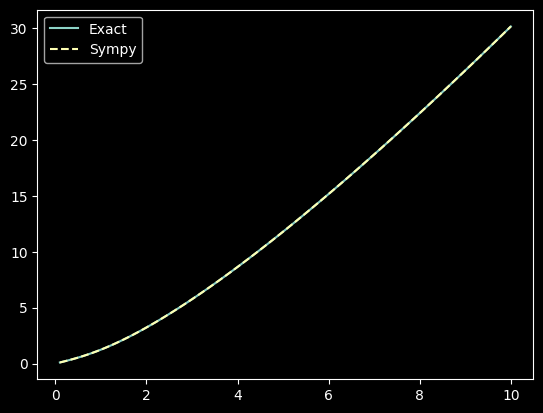

In [45]:
import matplotlib.pyplot as plt
import numpy as np

f_exact_lambdified = sp.lambdify(t, f_exact, modules="numpy")
f_result_lambdified = sp.lambdify(t, f_result, modules="numpy")

t_vals = np.linspace(0.1, 10, 100)

fig = plt.figure()
plt.plot(t_vals, f_exact_lambdified(t_vals), label="Exact")
plt.plot(t_vals, f_result_lambdified(t_vals), "--", label="Sympy")
plt.legend()
plt.show()
plt.close(fig)

## Partial Differential Equations

In [1]:
import sympy as sp
from sympy.abc import x, y

f = sp.Function("f")(x, y)  # f is a function of x and y

# fx will be the partial derivative of f with respect to x
fx = sp.Derivative(f, x)

# fy will be the partial derivative of f with respect to y
fy = sp.Derivative(f, y)

In [9]:
f = sp.Function("f")  # varibales are not passed

u = f(x, y)  # now u is a function of x and y

ux = u.diff(x)

uy = u.diff(y)

eq = sp.Eq(1 + (2 * (ux / u)) + (3 * (uy / u)), 0)

sp.pdsolve(eq)
# sp.pdsolve(eq, f(x, y))

In [10]:
result = sp.pdsolve(eq).rhs
sp.checkpdesol(eq, result)

(True, 0)

### Example: Linear partial differential equation with constant coefficients

The general form of this partial differential equation is

$$
a \frac{\partial f(x,y)}{\partial x}
+ b \frac{\partial f(x,y)}{\partial y}
+ c f(x,y) = G(x,y)
$$

where $a$, $b$, $c$ are constants and $G(x,y)$ is a function of $x$ and $y$.

The general solution of the PDE is:

$$
\begin{split}f(x, y) = \left. \left[F(\eta) + \frac{1}{a^2 + b^2}
\int\limits^{a x + b y} G\left(\frac{a \xi + b \eta}{a^2 + b^2},
\frac{- a \eta + b \xi}{a^2 + b^2} \right)
e^{\frac{c \xi}{a^2 + b^2}}\, d\xi\right]
e^{- \frac{c \xi}{a^2 + b^2}}
\right|_{\substack{\eta=- a y + b x\\ \xi=a x + b y }}\, ,\end{split}
$$

In [12]:
x, y, a, b, c = sp.symbols("x y a b c")
f, G = sp.symbols("f G", cls=sp.Function)

u = f(x, y)
ux = u.diff(x)
uy = u.diff(y)

genform = a * ux + b * uy + c * u - G(x, y)
genform

a*Derivative(f(x, y), x) + b*Derivative(f(x, y), y) + c*f(x, y) - G(x, y)

In [16]:
# sp.pdsolve(genform)
sp.pdsolve(genform, hint="1st_linear_constant_coeff_Integral")


Eq(f(x, y), Subs((F(eta) + Integral(G((a*xi + b*eta)/(a**2 + b**2), (-a*eta + b*xi)/(a**2 + b**2))*exp(c*xi/(a**2 + b**2)), (xi, a*x + b*y))/(a**2 + b**2))*exp(-c*xi/(a**2 + b**2)), (eta, xi), (-a*y + b*x, a*x + b*y)))